# **Data Mining and Machine Learning Assignment**

# **Import Nessary Library's**

In [93]:
# importing necessary libraries 
import pandas as pd    # pandas for data manipulation 
import numpy as np      # numpy for arithmatic operation  
import matplotlib.pyplot as plt   # matplotlib for data visualization
import seaborn as sns     # seaborn for advance visualization

# **Read The Dataset**

In [94]:
# read the csv file
df = pd.read_csv('ADMISSIONS.csv')

In [95]:
# first five row of data
df.head()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


In [96]:
# lost five row of data
df.tail()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
124,41055,44083,198330,2112-05-28 15:45:00,2112-06-07 16:50:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,ENGL,CATHOLIC,SINGLE,WHITE,2112-05-28 13:16:00,2112-05-28 17:30:00,PERICARDIAL EFFUSION,0,1
125,41070,44154,174245,2178-05-14 20:29:00,2178-05-15 09:45:00,2178-05-15 09:45:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,ENGL,PROTESTANT QUAKER,MARRIED,WHITE,2178-05-14 17:37:00,2178-05-14 22:08:00,ALTERED MENTAL STATUS,1,1
126,41087,44212,163189,2123-11-24 14:14:00,2123-12-30 14:31:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Medicare,ENGL,UNOBTAINABLE,SINGLE,BLACK/AFRICAN AMERICAN,NaN,NaN,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,1
127,41090,44222,192189,2180-07-19 06:55:00,2180-07-20 13:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,ENGL,CATHOLIC,SINGLE,WHITE,2180-07-19 04:50:00,2180-07-19 08:23:00,BRADYCARDIA,0,1
128,41092,44228,103379,2170-12-15 03:14:00,2170-12-24 18:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2170-12-15 02:22:00,2170-12-15 05:25:00,CHOLANGITIS,0,1


# **Exploratory Data Analysis (EDA)**

In [97]:
# Let's check the shape of the dataset
df.shape

(129, 19)

In [98]:
# column of Data
df.columns

Index(['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime',
       'deathtime', 'admission_type', 'admission_location',
       'discharge_location', 'insurance', 'language', 'religion',
       'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis',
       'hospital_expire_flag', 'has_chartevents_data'],
      dtype='object')

In [99]:
# check The null value of data
df.isnull().sum()

row_id                   0
subject_id               0
hadm_id                  0
admittime                0
dischtime                0
deathtime               89
admission_type           0
admission_location       0
discharge_location       0
insurance                0
language                48
religion                 1
marital_status          16
ethnicity                0
edregtime               37
edouttime               37
diagnosis                0
hospital_expire_flag     0
has_chartevents_data     0
dtype: int64

In [100]:
#total missing data
train_total = df.isnull().sum()
train_percent= ((df.isnull().sum()/df.shape[0])*100)

data_missing= pd.DataFrame({'train total':train_total, 'train percent': train_percent})
data_missing.sort_values(by='train total', ascending=False).head()

,train total,train percent
deathtime,89,68.992248
language,48,37.209302
edouttime,37,28.682171
edregtime,37,28.682171
marital_status,16,12.403101


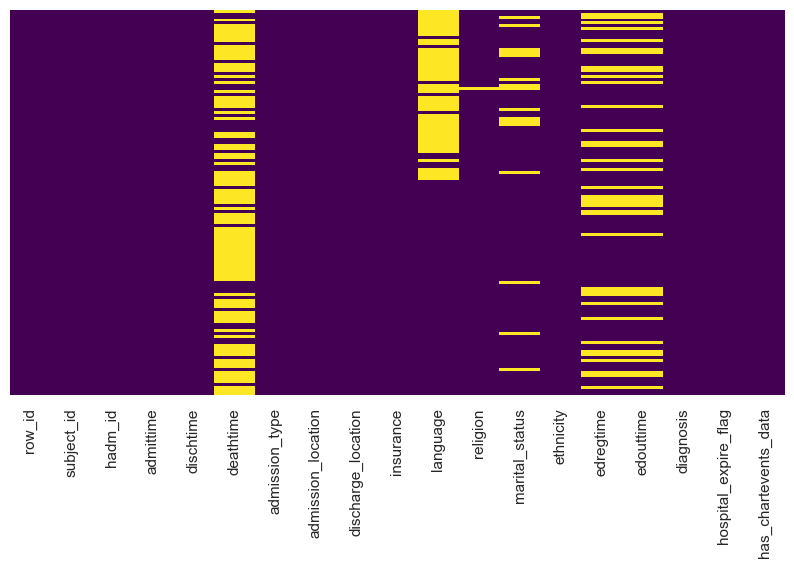

In [101]:
# plot the line plot to show the missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [102]:
# checking the datatypes of the columns
df.dtypes

row_id                   int64
subject_id               int64
hadm_id                  int64
admittime               object
dischtime               object
deathtime               object
admission_type          object
admission_location      object
discharge_location      object
insurance               object
language                object
religion                object
marital_status          object
ethnicity               object
edregtime               object
edouttime               object
diagnosis               object
hospital_expire_flag     int64
has_chartevents_data     int64
dtype: object

In [103]:
# checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   row_id                129 non-null    int64 
 1   subject_id            129 non-null    int64 
 2   hadm_id               129 non-null    int64 
 3   admittime             129 non-null    object
 4   dischtime             129 non-null    object
 5   deathtime             40 non-null     object
 6   admission_type        129 non-null    object
 7   admission_location    129 non-null    object
 8   discharge_location    129 non-null    object
 9   insurance             129 non-null    object
 10  language              81 non-null     object
 11  religion              128 non-null    object
 12  marital_status        113 non-null    object
 13  ethnicity             129 non-null    object
 14  edregtime             92 non-null     object
 15  edouttime             92 non-null     ob

In [104]:
#descriptive statististics for categorical columns
df.describe(include = 'object')

,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis
count,129,129,40,129,129,129,129,81,128,113,129,92,92,129
unique,129,129,40,3,5,10,4,5,10,6,9,92,92,95
top,2164-10-23 21:09:00,2164-11-01 17:15:00,2126-08-28 18:59:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS
freq,1,1,1,119,81,40,98,58,59,60,86,1,1,10


In [105]:
# statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
row_id,129.0,28036.441860,14036.548988,12258.0,12339.0,39869.0,40463.0,41092.0
subject_id,129.0,28010.410853,16048.502883,10006.0,10088.0,40310.0,42135.0,44228.0
hadm_id,129.0,152343.441860,27858.788248,100375.0,128293.0,157235.0,174739.0,199395.0
hospital_expire_flag,129.0,0.310078,0.464328,0.0,0.0,0.0,1.0,1.0
has_chartevents_data,129.0,0.992248,0.088045,0.0,1.0,1.0,1.0,1.0


In [106]:
# checking the unique values of the dataset
df.nunique()

row_id                  129
subject_id              100
hadm_id                 129
admittime               129
dischtime               129
deathtime                40
admission_type            3
admission_location        5
discharge_location       10
insurance                 4
language                  5
religion                 10
marital_status            6
ethnicity                 9
edregtime                92
edouttime                92
diagnosis                95
hospital_expire_flag      2
has_chartevents_data      2
dtype: int64

<Axes: >

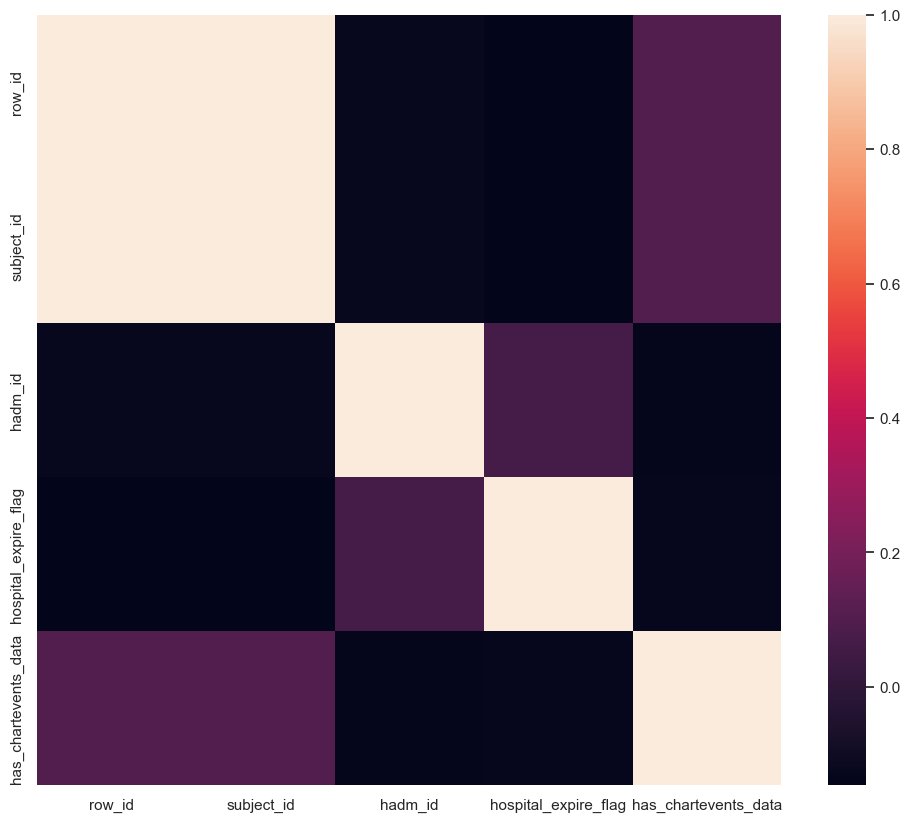

In [107]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Create the correlation matrix
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix)

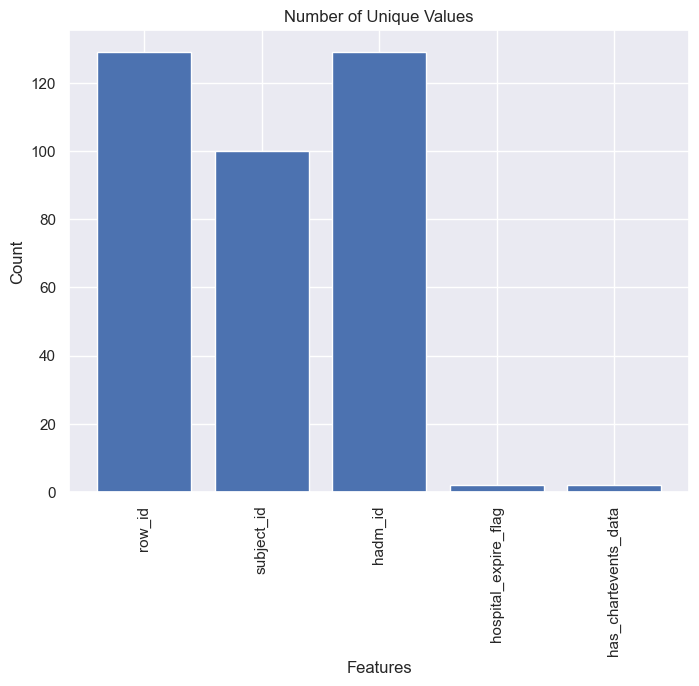

In [108]:
# Number of Unique Values
unique_values = df.select_dtypes(include='number').nunique()

# Creating the bar chart
plt.figure(figsize=(8, 6))
plt.bar(unique_values.index, unique_values.values)
plt.title('Number of Unique Values')
plt.xlabel('Features')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [109]:
#Check Number of Duplicates
n_duplicates = df.duplicated().sum()
print(f'We have {n_duplicates} duplicates in our dataset')

We have 0 duplicates in our dataset


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


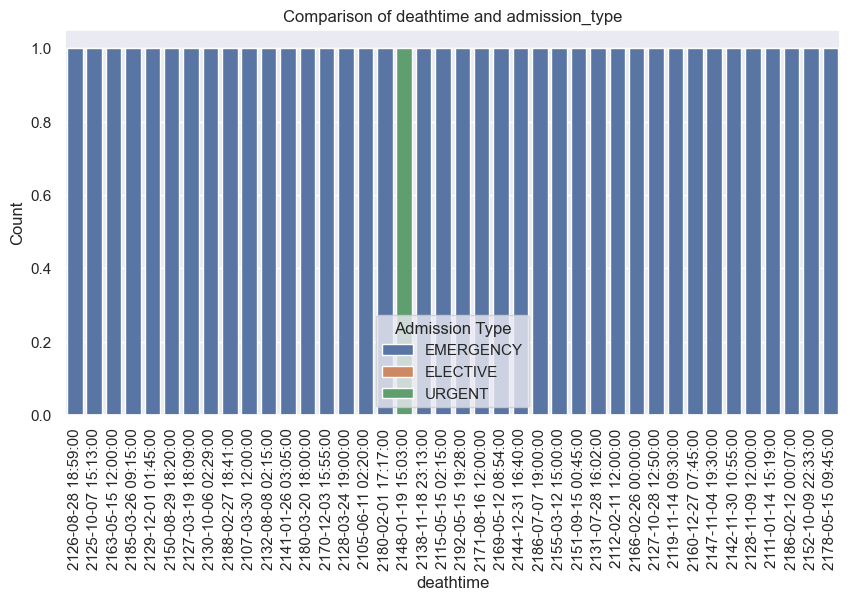

In [110]:
plt.figure(figsize=(10, 5))
sns.countplot(x='deathtime', hue='admission_type', data=df)
plt.title('Comparison of deathtime and admission_type')
plt.xlabel('deathtime')
plt.ylabel('Count')
plt.legend(title='Admission Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

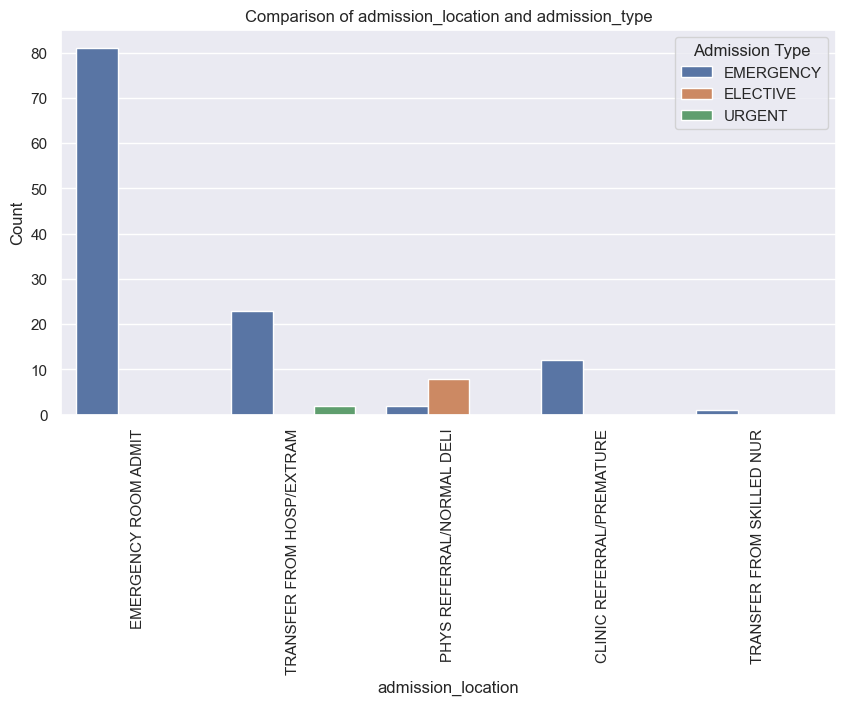

In [111]:
plt.figure(figsize=(10, 5))
sns.countplot(x='admission_location', hue='admission_type', data=df)
plt.title('Comparison of admission_location and admission_type')
plt.xlabel('admission_location')
plt.ylabel('Count')
plt.legend(title='Admission Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

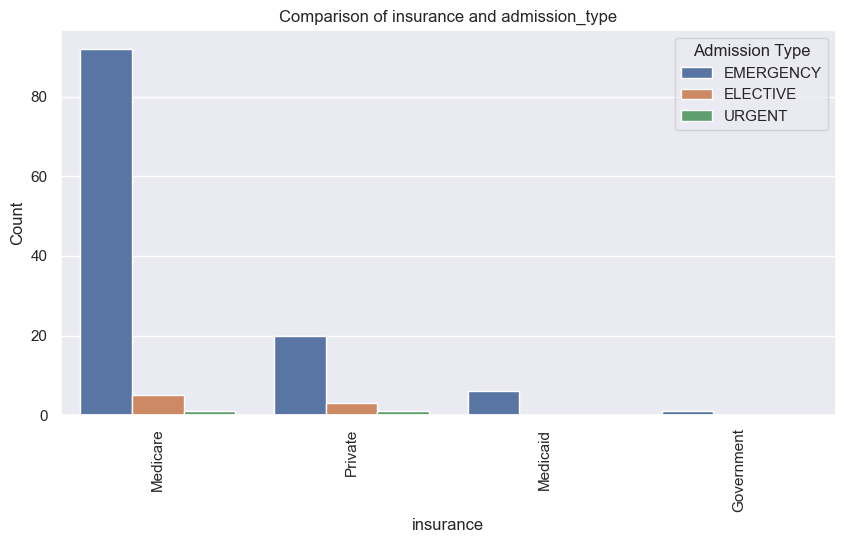

In [112]:
plt.figure(figsize=(10, 5))
sns.countplot(x='insurance', hue='admission_type', data=df)
plt.title('Comparison of insurance and admission_type')
plt.xlabel('insurance')
plt.ylabel('Count')
plt.legend(title='Admission Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

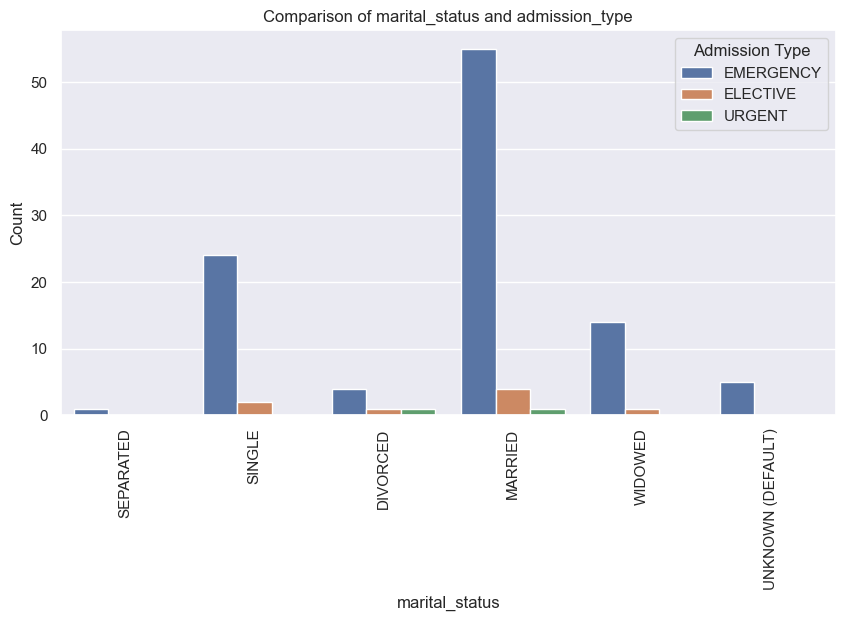

In [113]:
plt.figure(figsize=(10, 5))
sns.countplot(x='marital_status', hue='admission_type', data=df)
plt.title('Comparison of marital_status and admission_type')
plt.xlabel('marital_status')
plt.ylabel('Count')
plt.legend(title='Admission Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

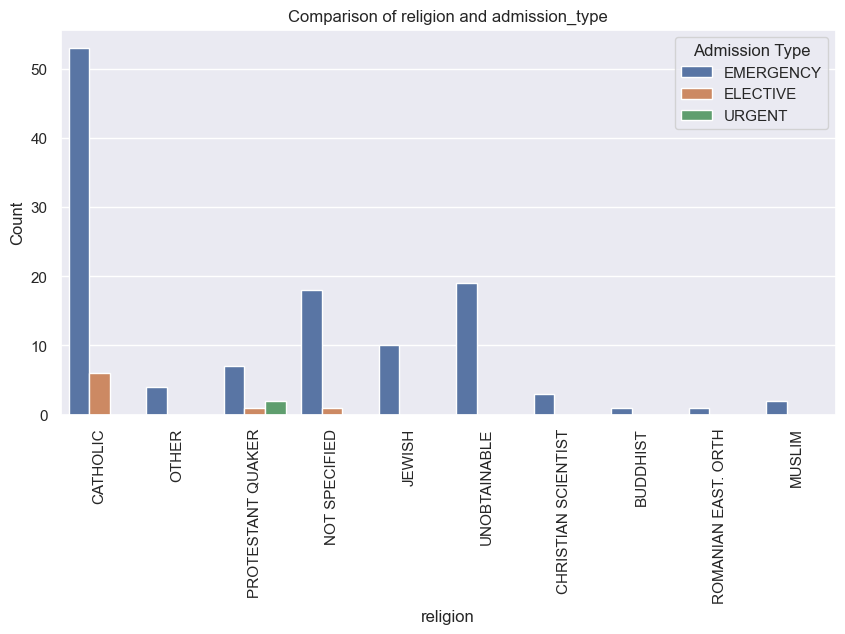

In [114]:
plt.figure(figsize=(10, 5))
sns.countplot(x='religion', hue='admission_type', data=df)
plt.title('Comparison of religion and admission_type')
plt.xlabel('religion')
plt.ylabel('Count')
plt.legend(title='Admission Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

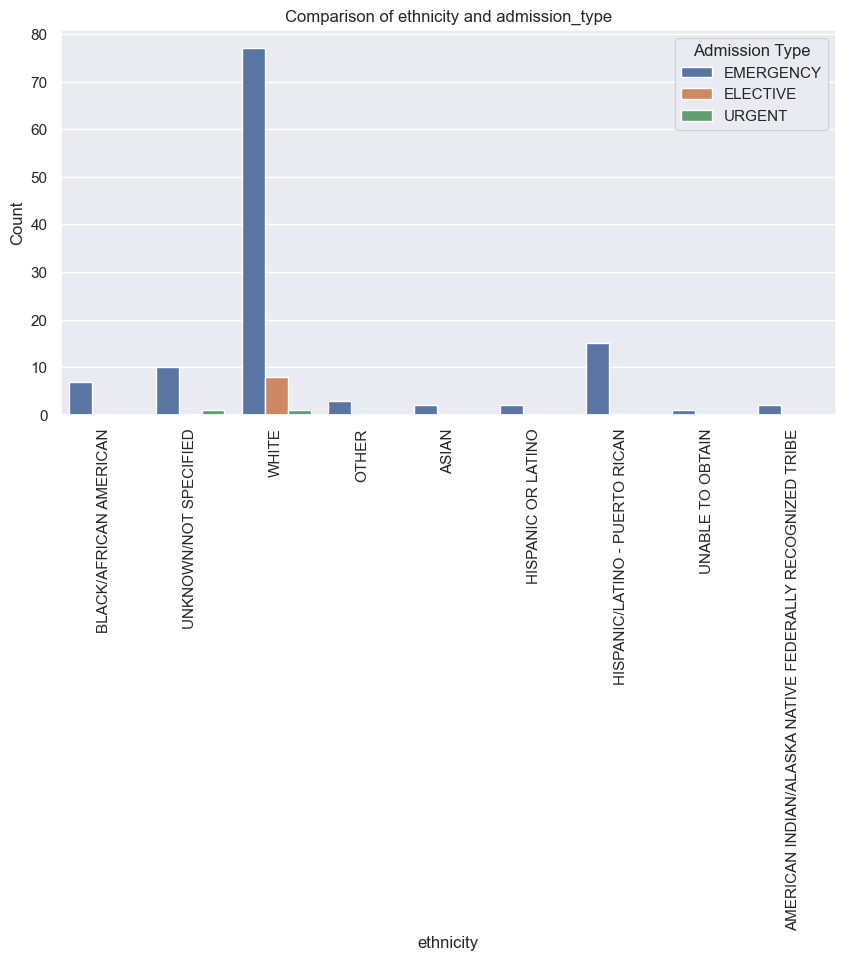

In [115]:
plt.figure(figsize=(10, 5))
sns.countplot(x='ethnicity', hue='admission_type', data=df)
plt.title('Comparison of ethnicity and admission_type')
plt.xlabel('ethnicity')
plt.ylabel('Count')
plt.legend(title='Admission Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

C:\Users\0630\AppData\Local\Temp\ipykernel_9916\2703626083.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


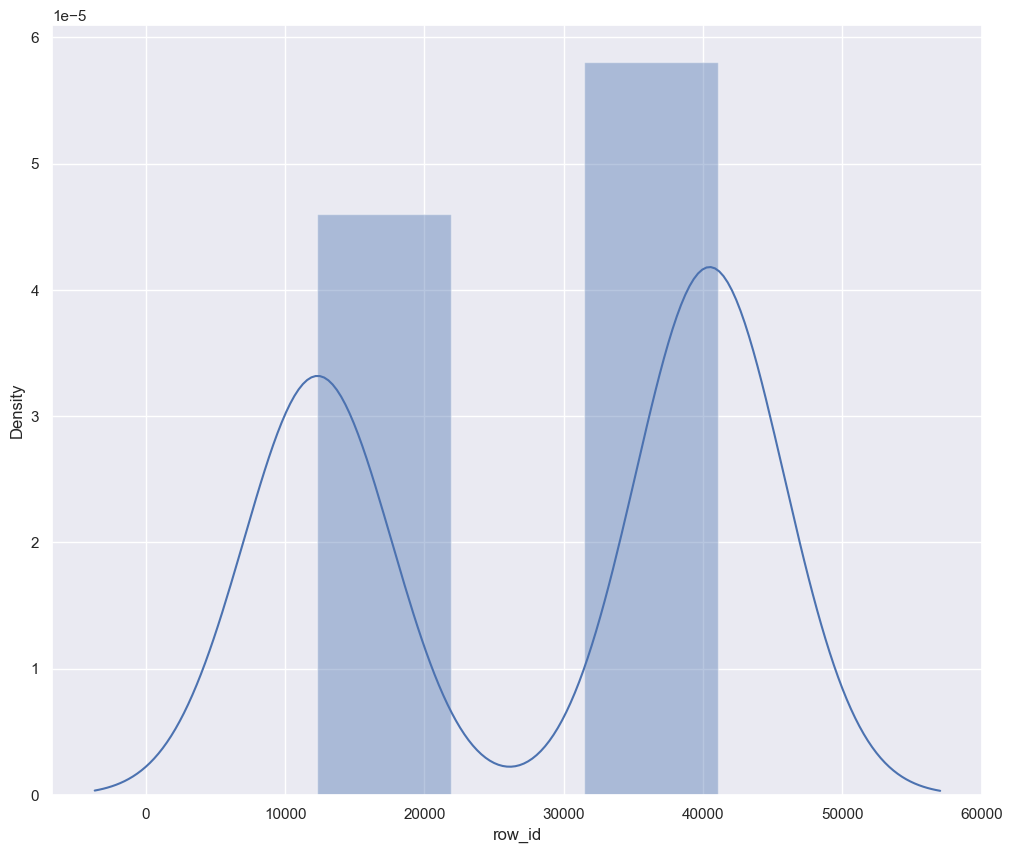

C:\Users\0630\AppData\Local\Temp\ipykernel_9916\2703626083.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


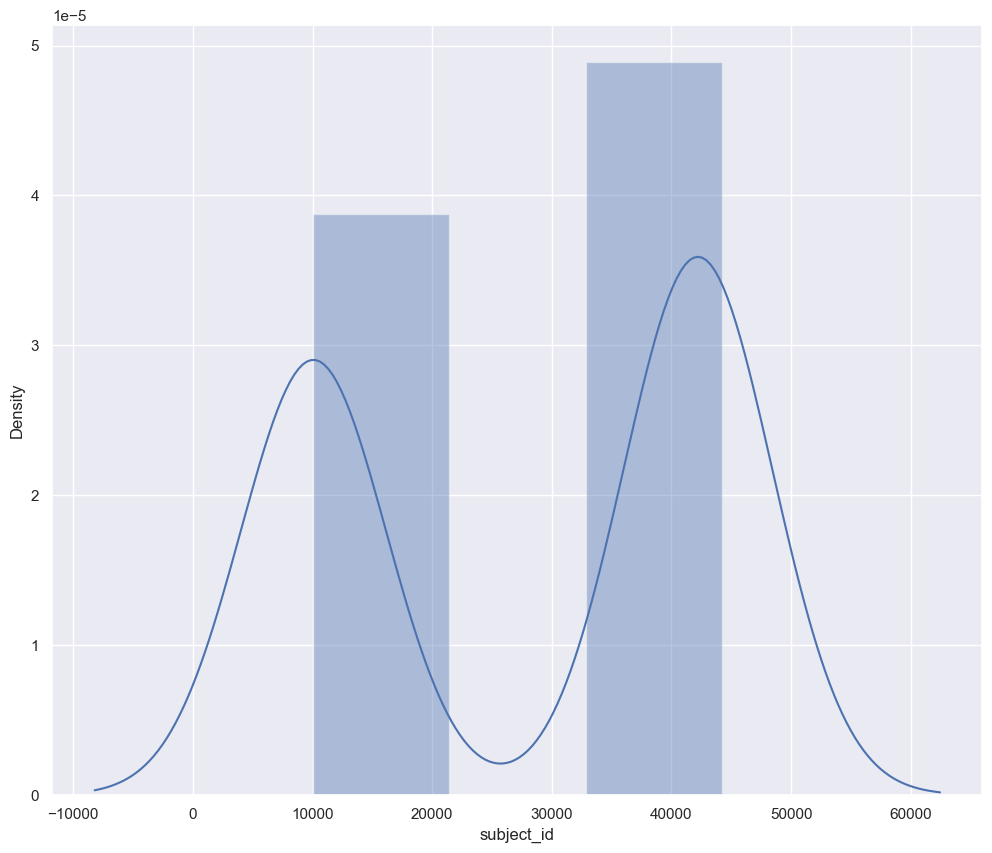

C:\Users\0630\AppData\Local\Temp\ipykernel_9916\2703626083.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


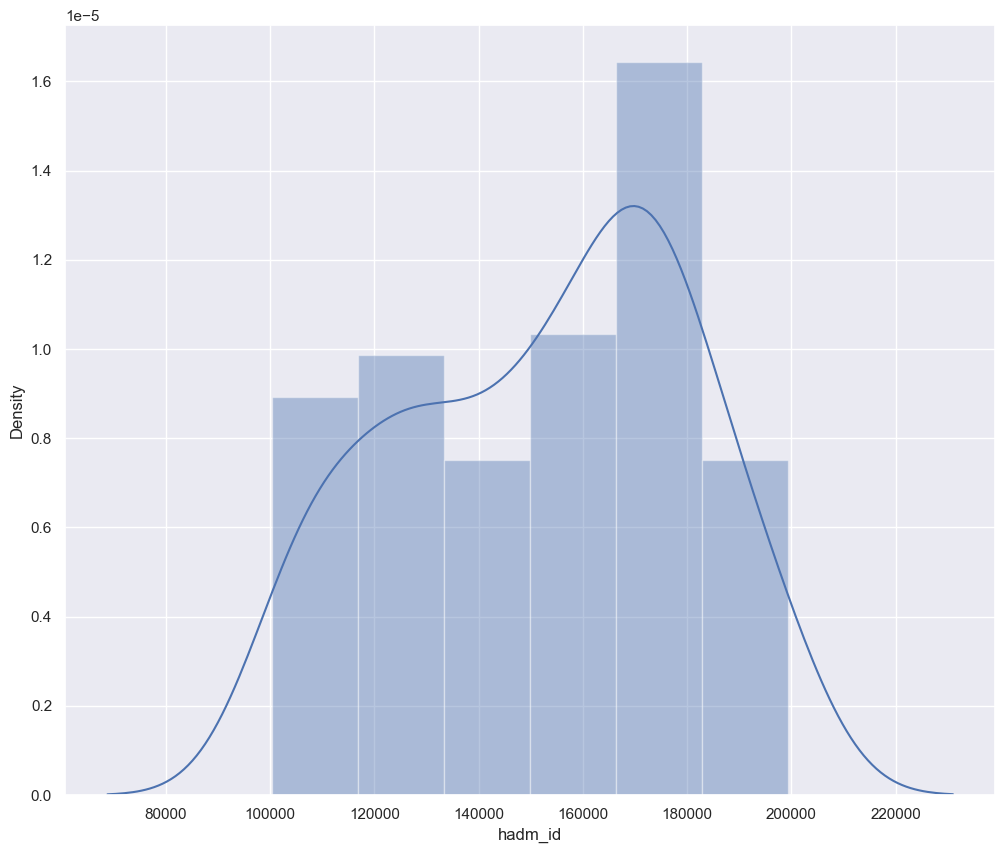

C:\Users\0630\AppData\Local\Temp\ipykernel_9916\2703626083.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


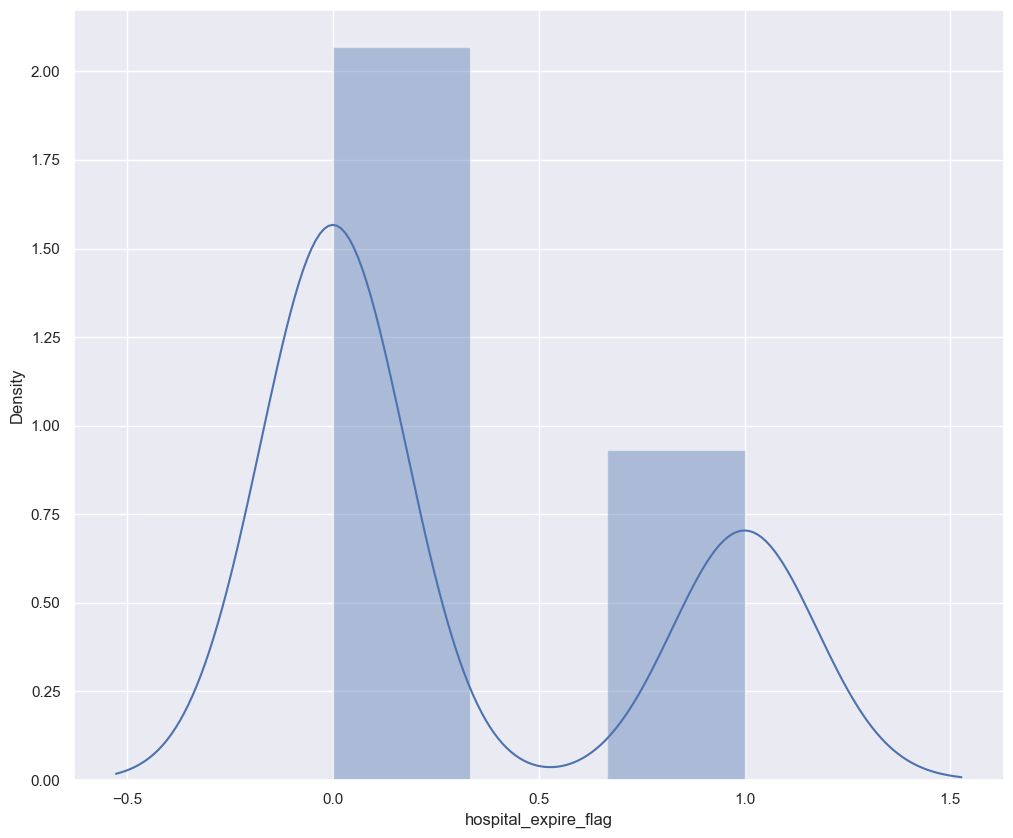

C:\Users\0630\AppData\Local\Temp\ipykernel_9916\2703626083.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


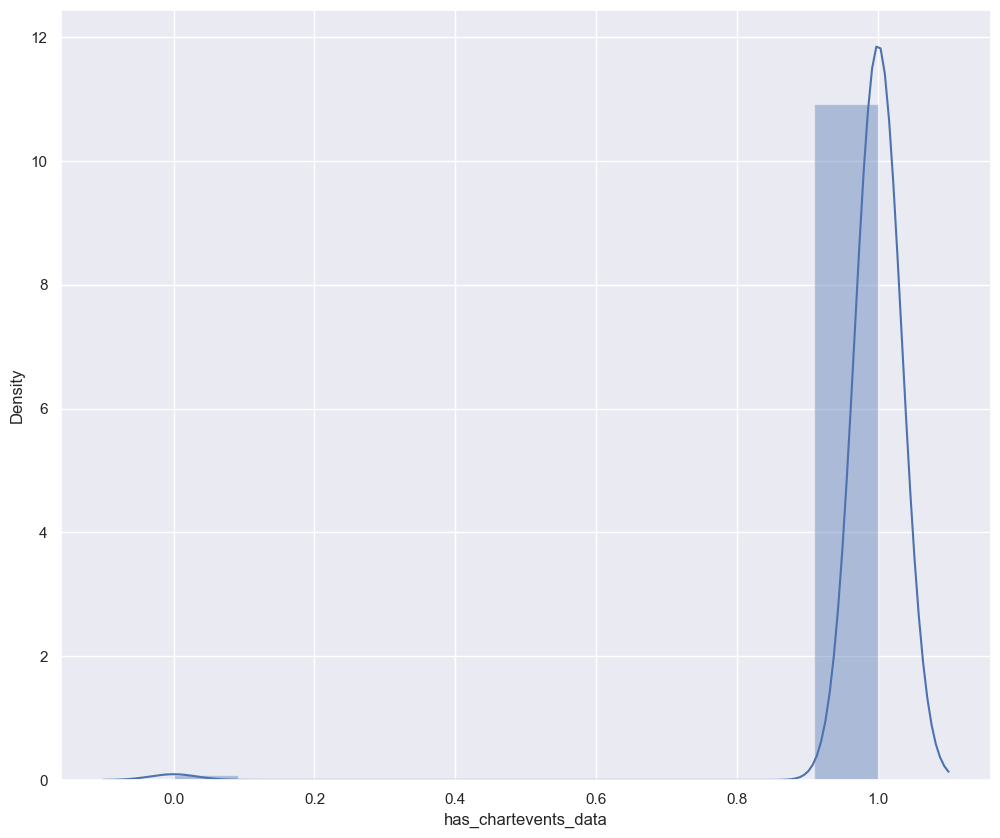

In [116]:
# write a for loop to print the density plot for each numerical column
for i in df.select_dtypes(include=np.number).columns[:5]:
    sns.distplot(df[i])
    plt.show()

In [117]:
# getting the colun names 
df.columns

Index(['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime',
       'deathtime', 'admission_type', 'admission_location',
       'discharge_location', 'insurance', 'language', 'religion',
       'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis',
       'hospital_expire_flag', 'has_chartevents_data'],
      dtype='object')

<Axes: xlabel='admission_type', ylabel='ethnicity'>

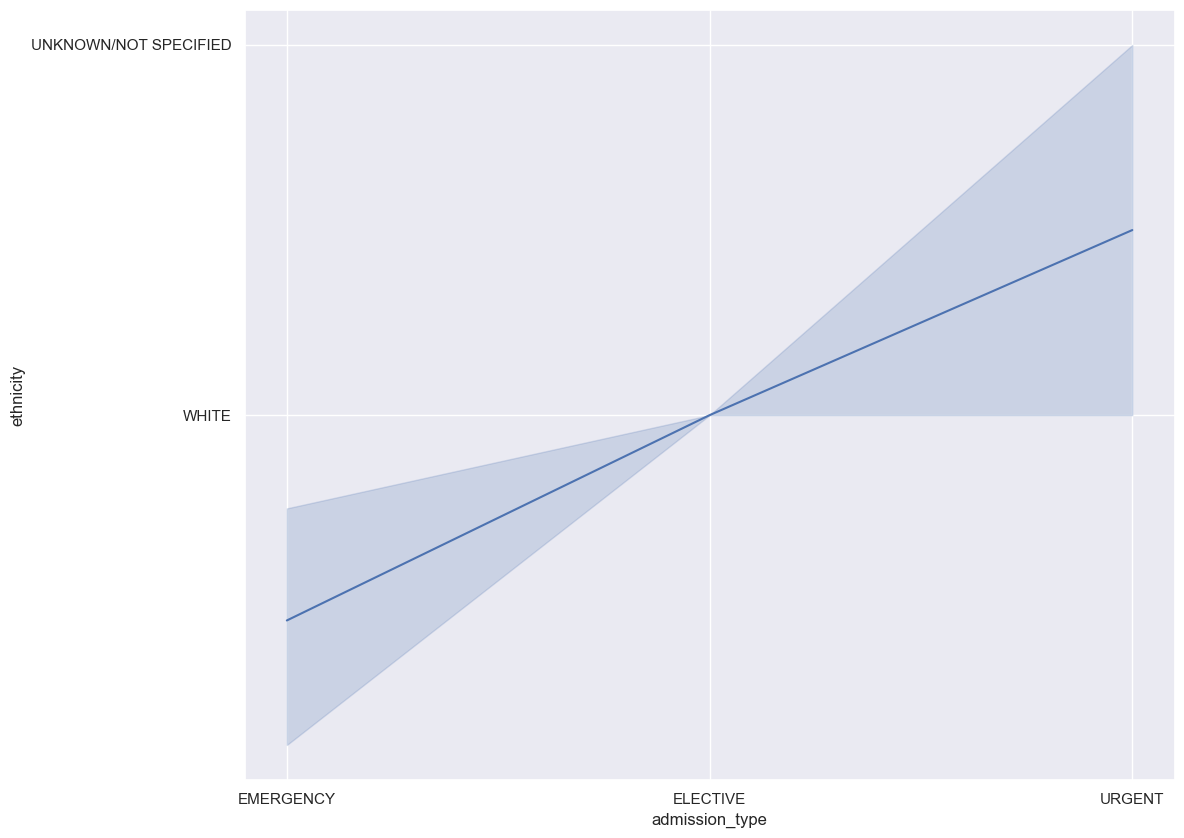

In [118]:
# line plot for the admission_type 
sns.lineplot(x='admission_type',y='ethnicity',data=df)

<Axes: xlabel='count', ylabel='admission_type'>

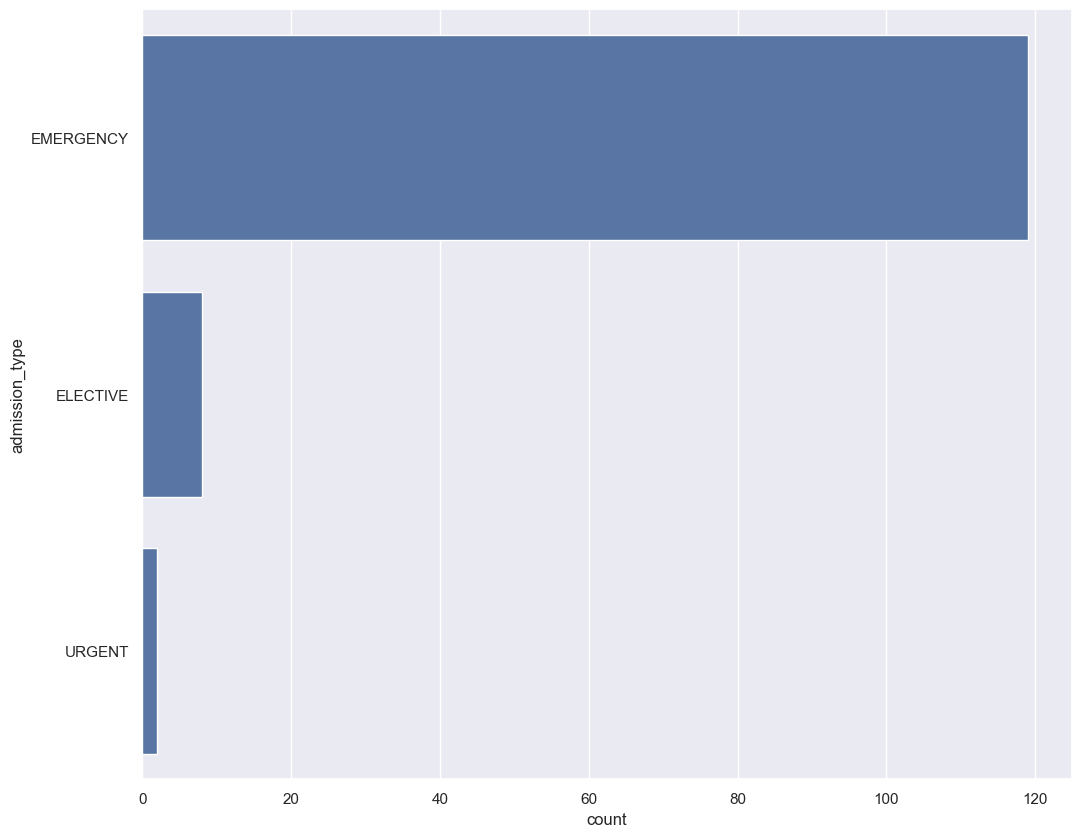

In [119]:
sns.countplot(df['admission_type'])

<Axes: xlabel='admission_type', ylabel='marital_status'>

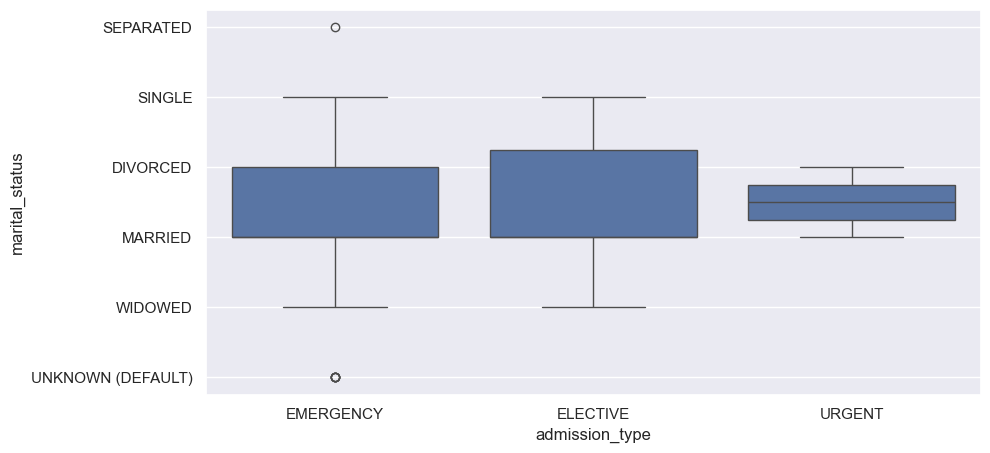

In [120]:
# plot the box plot for the marital_status and is promoted columns
plt.figure(figsize=(10,5))

sns.boxplot(x='admission_type',y='marital_status',data=df)

In [121]:
df.columns

Index(['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime',
       'deathtime', 'admission_type', 'admission_location',
       'discharge_location', 'insurance', 'language', 'religion',
       'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis',
       'hospital_expire_flag', 'has_chartevents_data'],
      dtype='object')

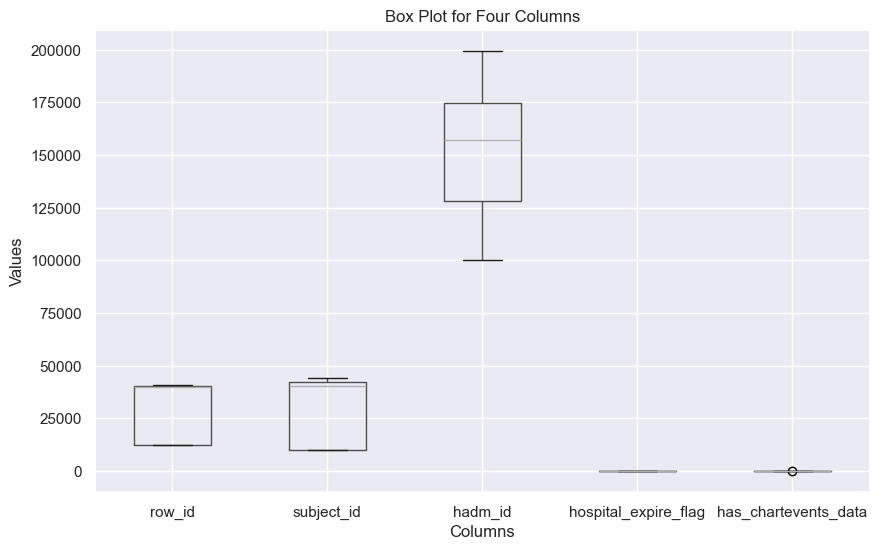

In [122]:
# Subset the DataFrame with the selected columns
subset_data = df

# Create the box plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
subset_data.boxplot()

# Add title and labels
plt.title('Box Plot for Four Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Display the plot
plt.show()

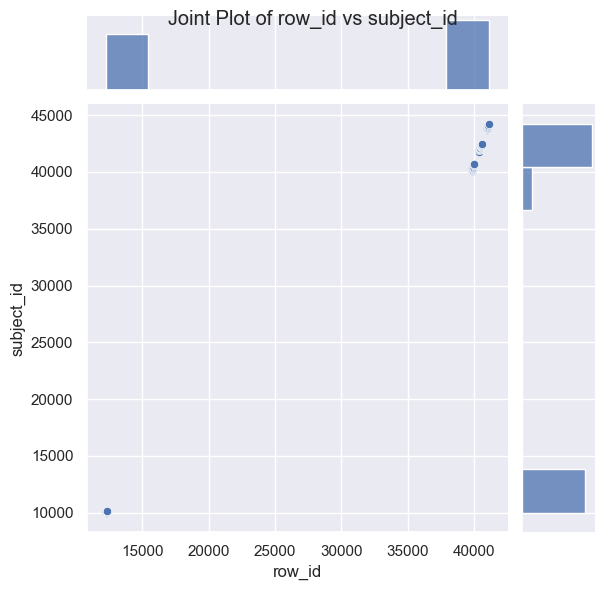

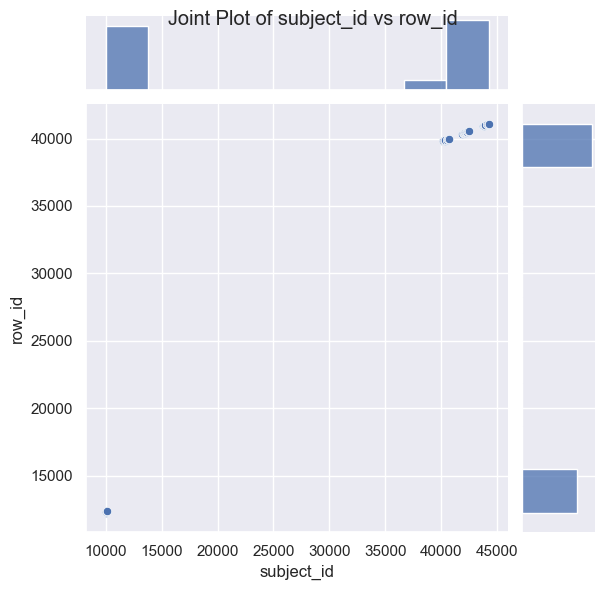

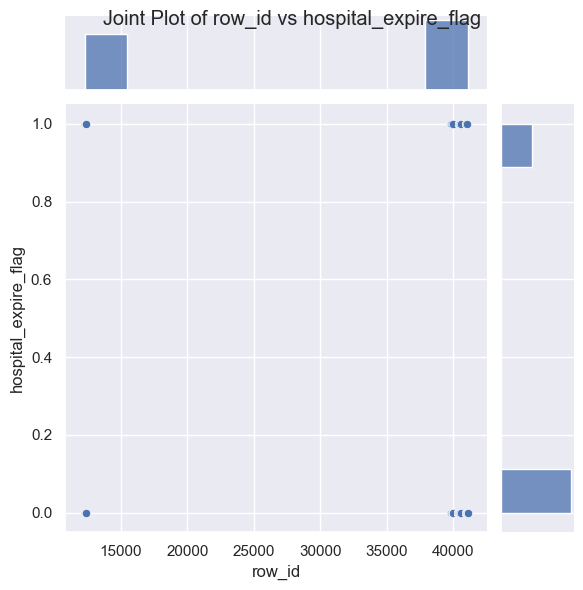

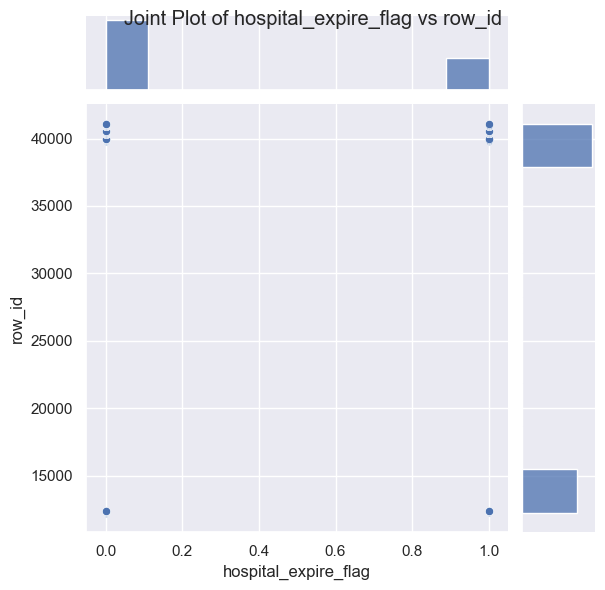

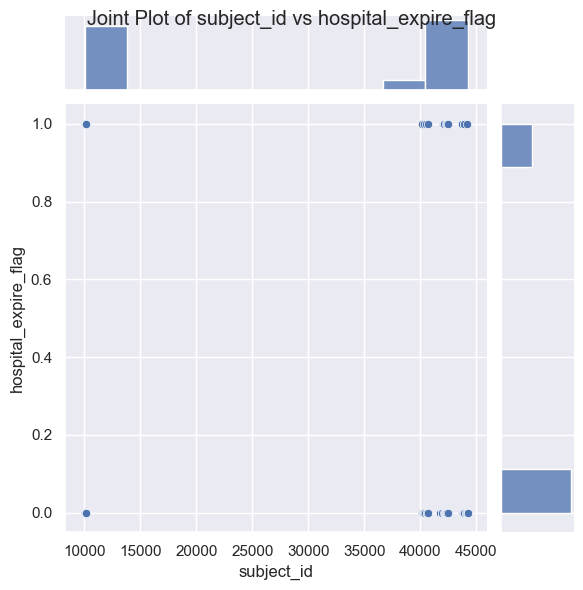

In [123]:
# Assuming you have a DataFrame named 'df' containing your data

# Get the numerical columns of the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Find the five most correlated pairs of columns
correlation_matrix = df[numerical_columns].corr().abs()
sorted_correlations = correlation_matrix.unstack().sort_values(ascending=False)
top_correlations = sorted_correlations[sorted_correlations < 1.0].head(5)
top_pairs = [(pair[0], pair[1]) for pair in top_correlations.index]

# Create joint plots for the five most correlated pairs
for volume, available_supply in top_pairs[:5]:
    sns.jointplot(data=df, x=volume, y=available_supply, kind='scatter')
    sns.set(rc={'figure.figsize':(6,4)})
    plt.suptitle(f"Joint Plot of {volume} vs {available_supply}")
    plt.show()

__________________________________________________
subject_id
__________________________________________________


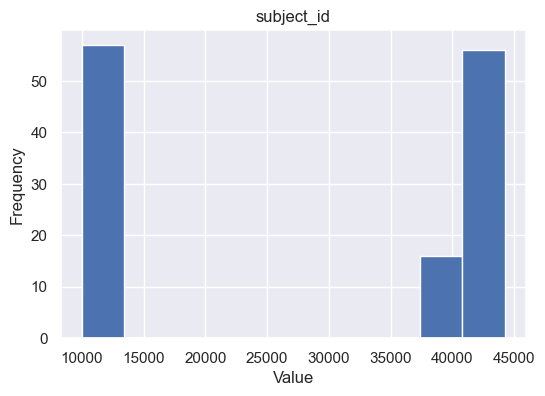

__________________________________________________
hadm_id
__________________________________________________


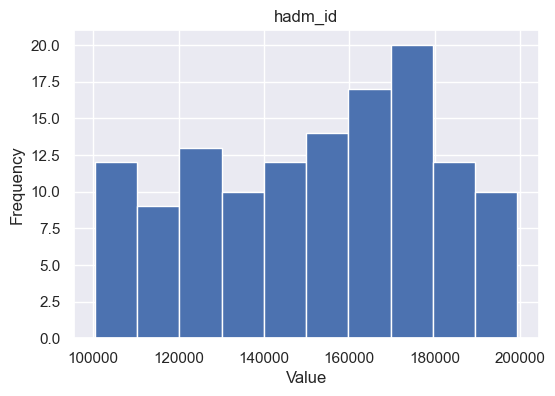

__________________________________________________
hospital_expire_flag
__________________________________________________


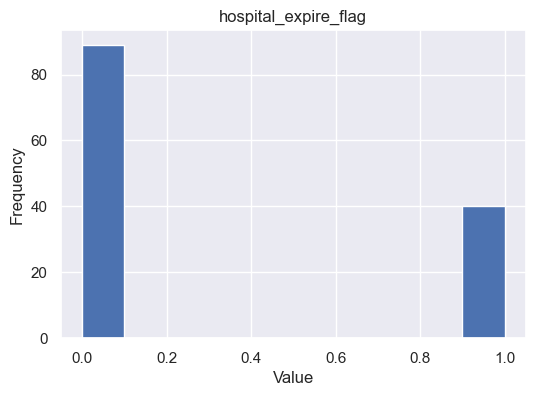

__________________________________________________
has_chartevents_data
__________________________________________________


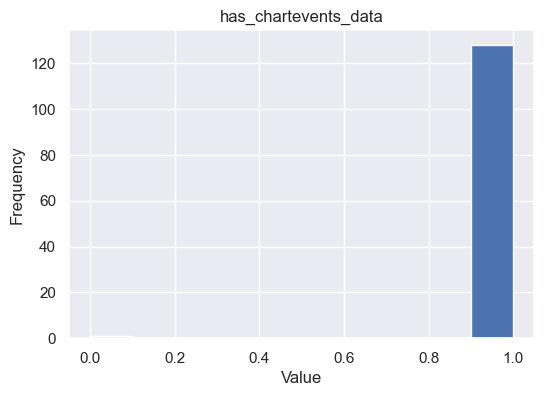

In [124]:
# Get all numeric columns in the dataframe
numeric_columns = df.select_dtypes(include='number').columns

# Choose the first five numeric columns (you can modify this as per your requirement)
five_columns = numeric_columns[1:5]

# Iterate over each of the selected columns and plot a histogram
for column in five_columns:
    print('__________________________________________________')
    print(column)
    print('__________________________________________________')
    sns.set(rc={'figure.figsize':(6,4)})
    plt.figure()  # Create a new figure for each histogram
    plt.hist(df[column], bins=10)  # Plot the histogram with 10 bins
    plt.title(column)  # Set the title of the histogram as the column name
    plt.xlabel('Value')  # Set the x-axis label
    plt.ylabel('Frequency')  # Set the y-axis label
    plt.show()  # Display the histogram

In [125]:
df.columns

Index(['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime',
       'deathtime', 'admission_type', 'admission_location',
       'discharge_location', 'insurance', 'language', 'religion',
       'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis',
       'hospital_expire_flag', 'has_chartevents_data'],
      dtype='object')

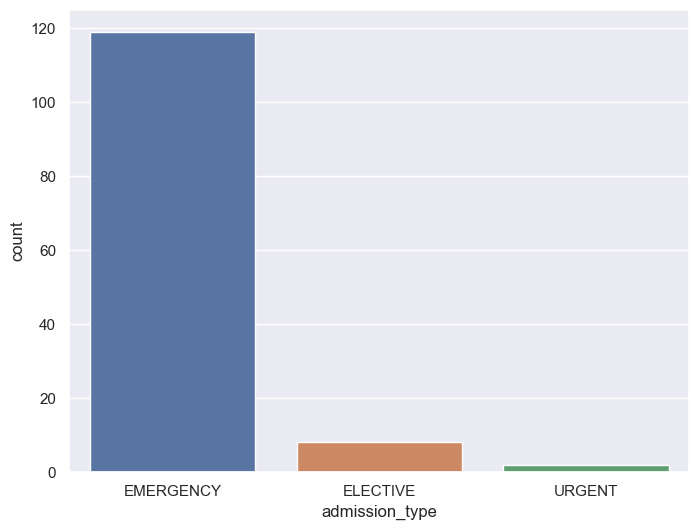

In [126]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))
ax = sns.countplot(x='admission_type', hue="admission_type", data=df)
plt.show() 

_________________________________________
row_id
_________________________________________


C:\Users\0630\AppData\Local\Temp\ipykernel_9916\458311604.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


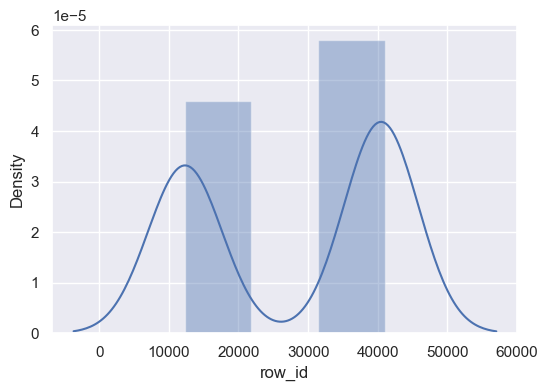

_________________________________________
subject_id
_________________________________________


C:\Users\0630\AppData\Local\Temp\ipykernel_9916\458311604.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


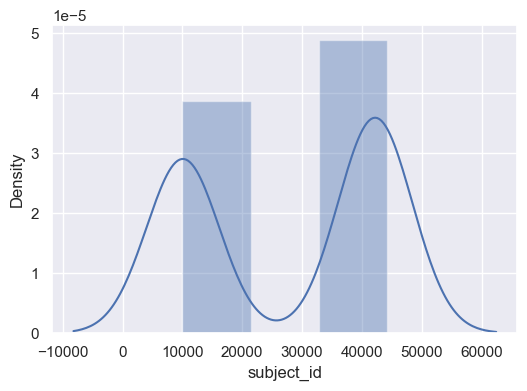

_________________________________________
hadm_id
_________________________________________


C:\Users\0630\AppData\Local\Temp\ipykernel_9916\458311604.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


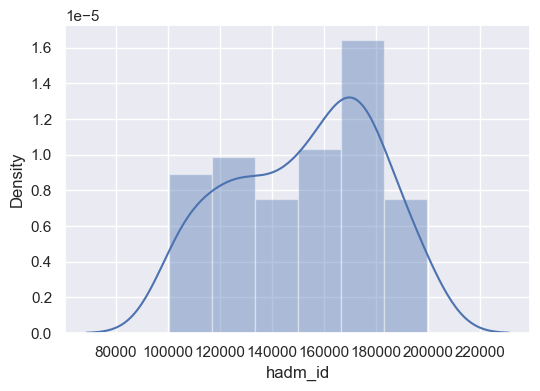

_________________________________________
hospital_expire_flag
_________________________________________


C:\Users\0630\AppData\Local\Temp\ipykernel_9916\458311604.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


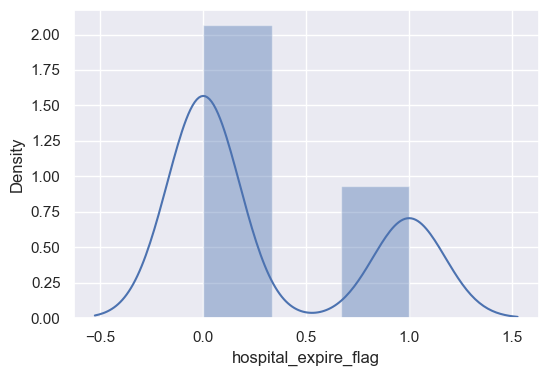

_________________________________________
has_chartevents_data
_________________________________________


C:\Users\0630\AppData\Local\Temp\ipykernel_9916\458311604.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


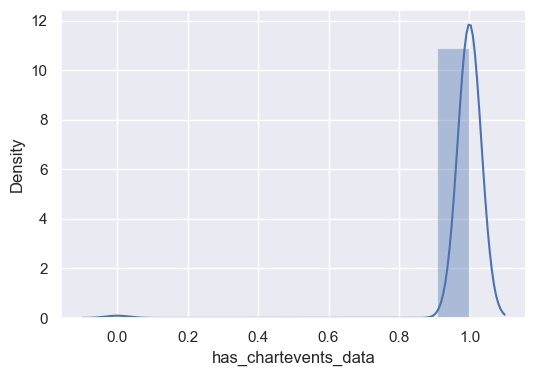

In [127]:
import numpy as np
# write a for loop to print the density plot for each numerical column
for i in df.select_dtypes(include=np.number).columns[:5]:
    print('_________________________________________')
    print(i)
    print('_________________________________________')
    sns.distplot(df[i])
    plt.show()

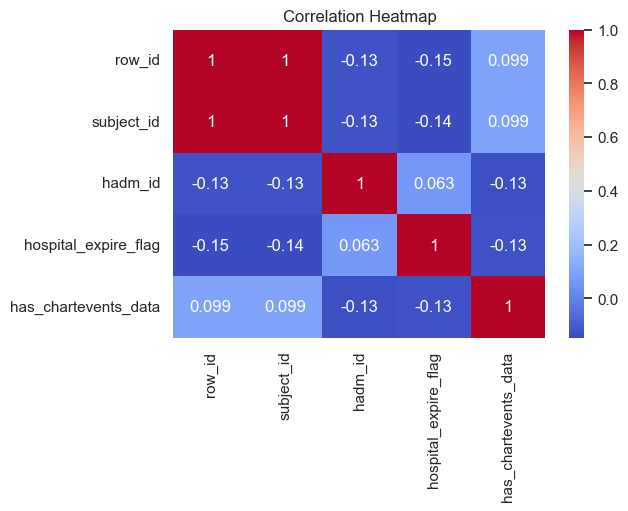

In [128]:
# Plot correlation heatmap
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
sns.set(rc={'figure.figsize':(12,10)})
plt.title('Correlation Heatmap')
plt.show()

# **Data preprocessing**

In [129]:
df.columns

Index(['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime',
       'deathtime', 'admission_type', 'admission_location',
       'discharge_location', 'insurance', 'language', 'religion',
       'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis',
       'hospital_expire_flag', 'has_chartevents_data'],
      dtype='object')

In [130]:
# before fill a null value
df.isnull().sum().sum()

228

In [131]:
# fill a null value
df.ffill(inplace=True)
df.bfill(inplace=True)

In [132]:
# After fill a null value
df.isnull().sum().sum()

0

In [133]:
# Check The String Data
df.select_dtypes ('object').sum()

admittime             2164-10-23 21:09:002126-08-14 22:32:002125-10-...
dischtime             2164-11-01 17:15:002126-08-28 18:59:002125-10-...
deathtime             2126-08-28 18:59:002126-08-28 18:59:002125-10-...
admission_type        EMERGENCYEMERGENCYEMERGENCYEMERGENCYEMERGENCYE...
admission_location    EMERGENCY ROOM ADMITTRANSFER FROM HOSP/EXTRAMT...
discharge_location    HOME HEALTH CAREDEAD/EXPIREDDEAD/EXPIREDSNFDEA...
insurance             MedicarePrivateMedicareMedicareMedicareMedicar...
language              POLIPOLIPOLIPOLIPOLIPOLIPOLIPOLIPOLIPOLIPOLIPO...
religion              CATHOLICCATHOLICCATHOLICCATHOLICCATHOLICOTHERC...
marital_status        SEPARATEDSINGLESINGLEDIVORCEDDIVORCEDDIVORCEDM...
ethnicity             BLACK/AFRICAN AMERICANUNKNOWN/NOT SPECIFIEDUNK...
edregtime             2164-10-23 16:43:002164-10-23 16:43:002164-10-...
edouttime             2164-10-23 23:00:002164-10-23 23:00:002164-10-...
diagnosis             SEPSISHEPATITIS BSEPSISHUMERAL FRACTUREALC

In [134]:
# Before Applying Labelencoder
df.head()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,2126-08-28 18:59:00,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,POLI,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,POLI,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,2164-10-23 16:43:00,2164-10-23 23:00:00,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,POLI,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,2125-10-07 15:13:00,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,POLI,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,POLI,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,ALCOHOLIC HEPATITIS,1,1


In [135]:
from sklearn.preprocessing import LabelEncoder

In [136]:
# Store a String Data in col column
col = df.select_dtypes(object)

In [137]:
le = LabelEncoder()

In [138]:
for i in col:
    df[i] = le.fit_transform(df[i])

c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will

In [139]:
# After Applying Labelencoder
df.head()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,80,80,7,1,1,3,2,2,1,2,2,54,54,73,0,1
1,12263,10011,105331,27,27,7,1,3,0,3,2,1,3,7,54,54,36,1,1
2,12265,10013,165520,26,26,6,1,3,0,2,2,1,3,7,54,54,73,1,1
3,12269,10017,199207,62,62,6,1,1,9,2,2,1,0,8,39,39,37,0,1
4,12270,10019,177759,78,78,27,1,3,0,2,2,1,0,8,39,39,8,1,1


In [140]:
# Target Column Value counts
df['admission_type'].value_counts()

admission_type
1    119
0      8
2      2
Name: count, dtype: int64

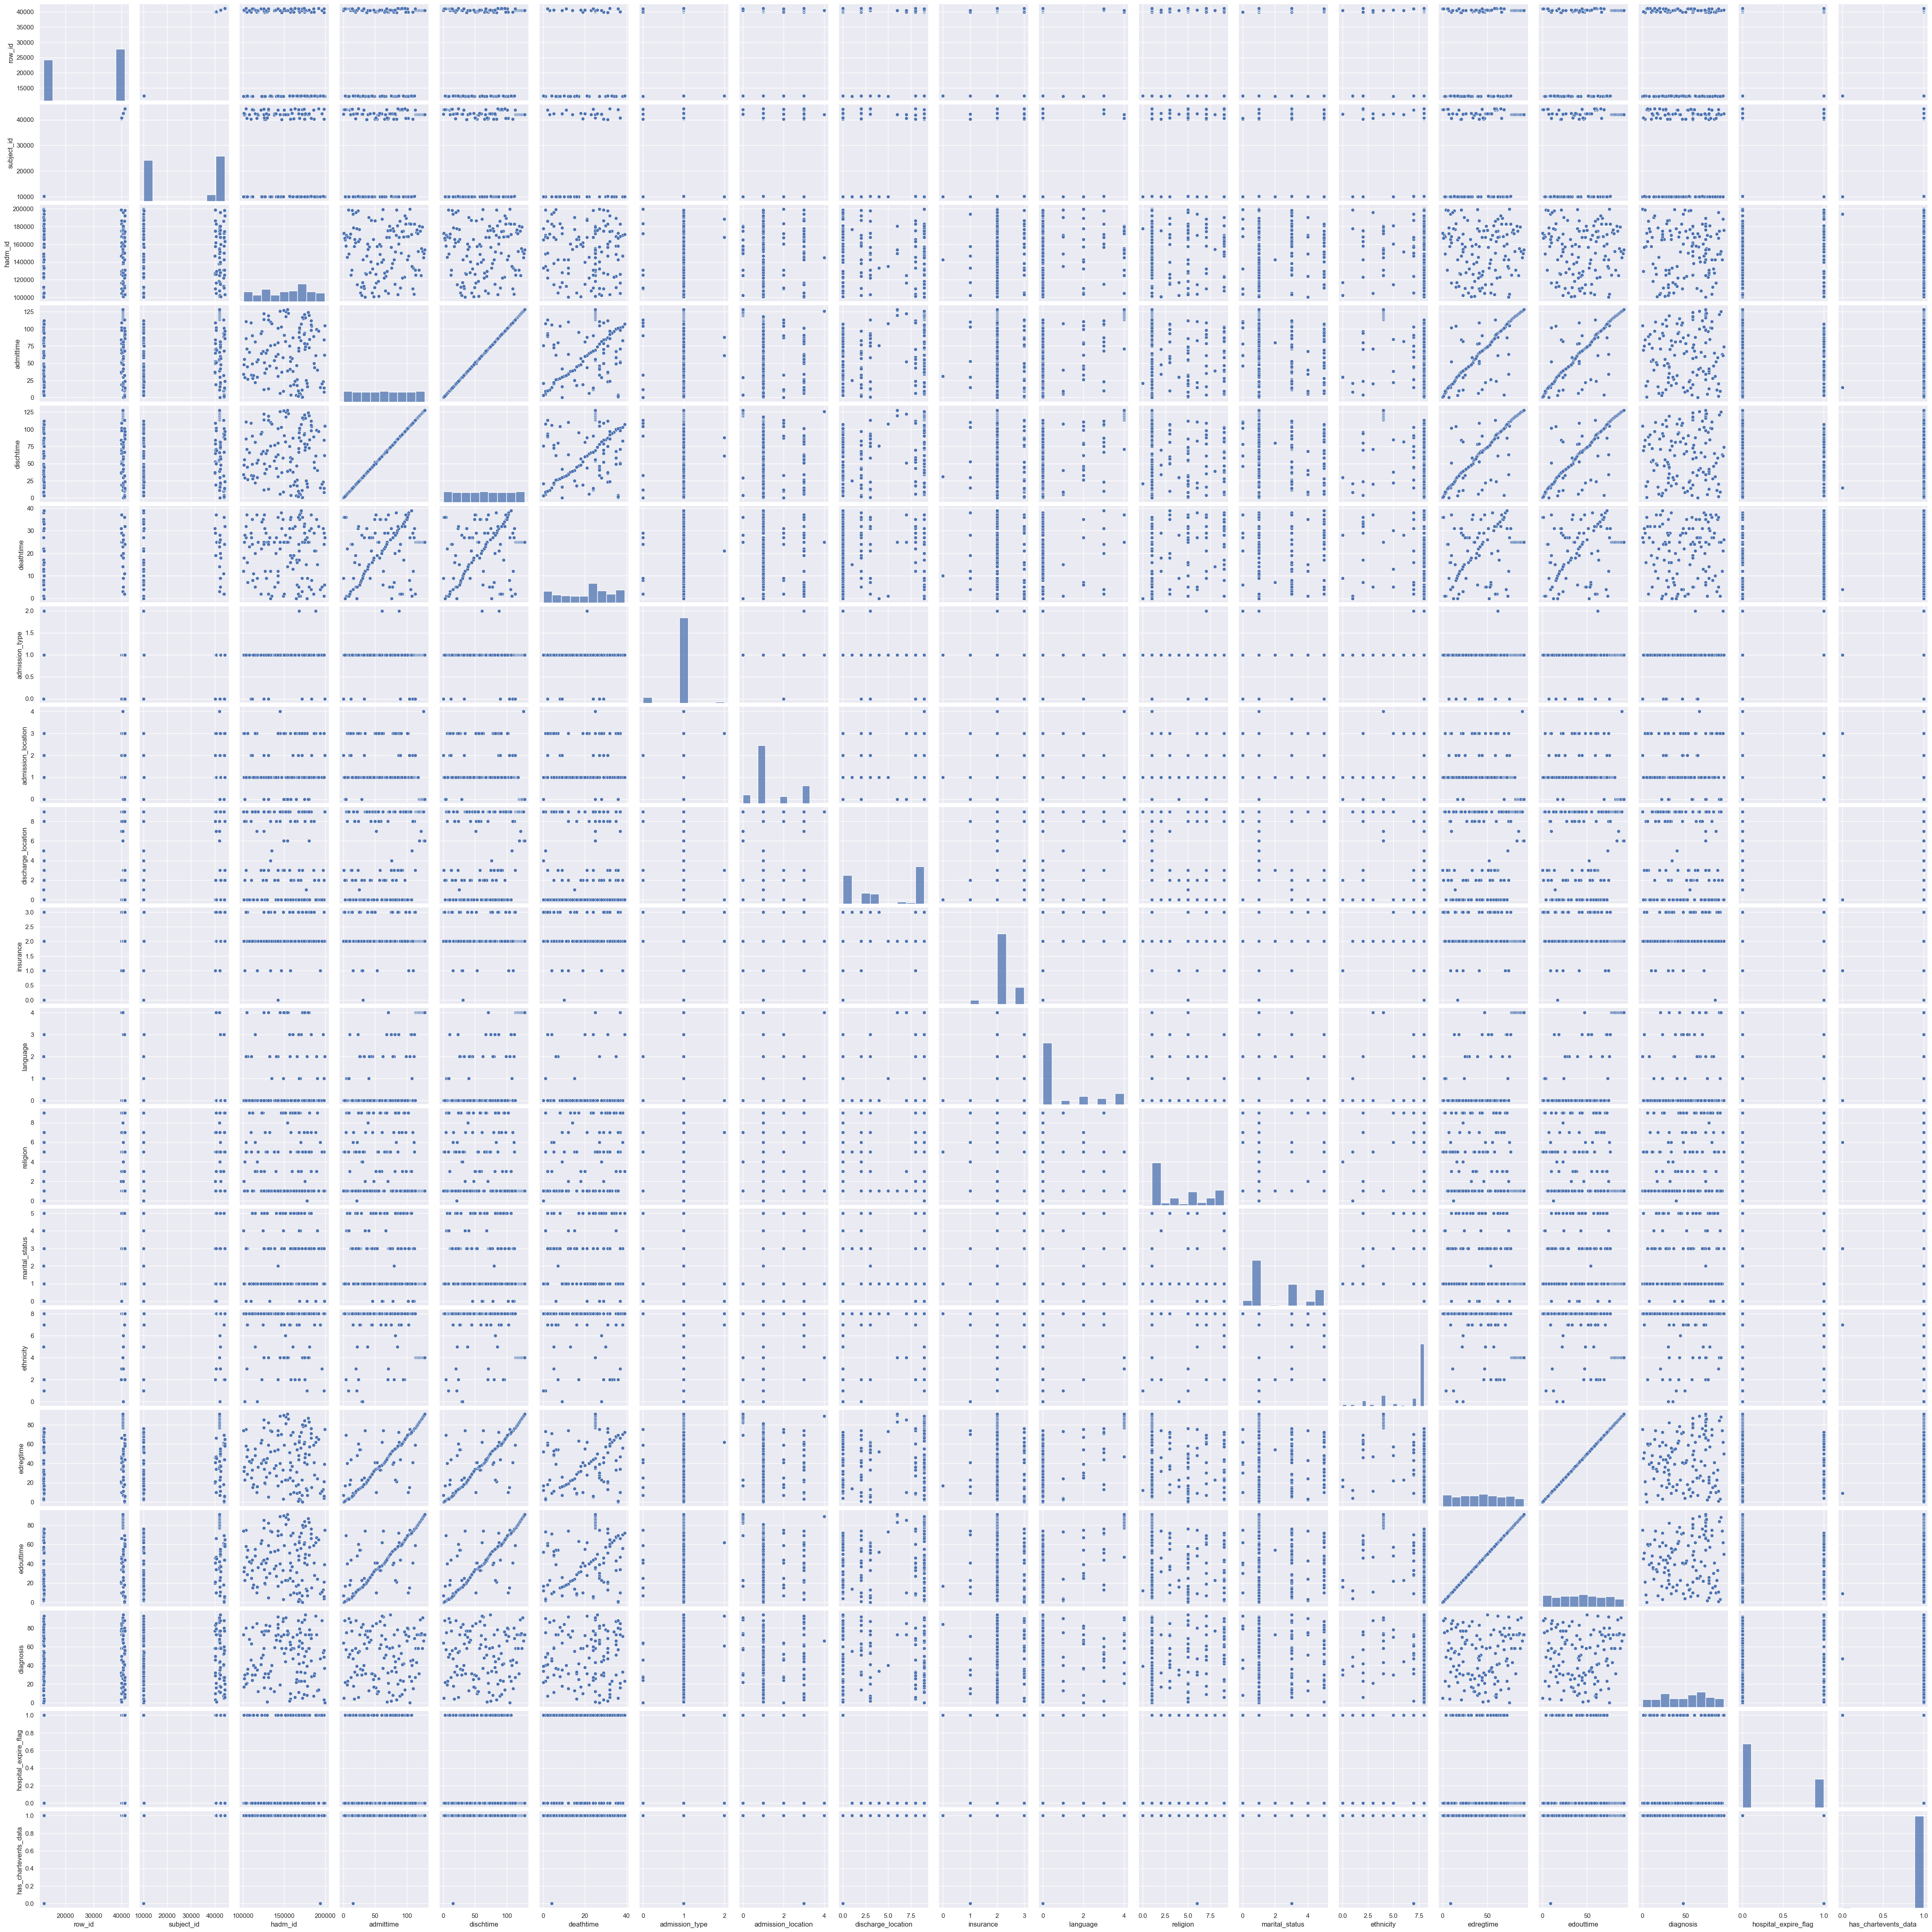

In [165]:
sns.pairplot(df)

## **RandomOverSampler Technique**

In [141]:
x=df.drop('admission_type',axis=1)
y=df['admission_type']

In [142]:
y.value_counts()

admission_type
1    119
0      8
2      2
Name: count, dtype: int64

In [143]:
# applying the smote technique to balance the dataset
from imblearn.over_sampling import RandomOverSampler
ram = RandomOverSampler()

x_smote, y_smote = ram.fit_resample(x,y)


c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will

In [144]:
# after applying the RandomOverSampler technique the shape of the dataset
print(f'Here is the shape of the x_smote {x_smote.shape}')
print(f'Here is the shape of the y_smote {y_smote.shape}')

# value counts of the y after and RandomOverSampler applying the smote 
print('______________________________________________________________________________')
print(f'Here is the value counts of the y before applying the RandomOverSampler {y.value_counts()}')
print('______________________________________________________________________________')
print(f'Here is the value counts of the y after applying the RandomOverSampler {y_smote.value_counts()}')

Here is the shape of the x_smote (357, 18)
Here is the shape of the y_smote (357,)
______________________________________________________________________________
Here is the value counts of the y before applying the RandomOverSampler admission_type
1    119
0      8
2      2
Name: count, dtype: int64
______________________________________________________________________________
Here is the value counts of the y after applying the RandomOverSampler admission_type
1    119
0    119
2    119
Name: count, dtype: int64


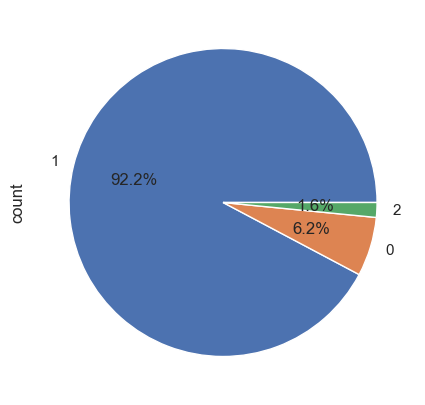

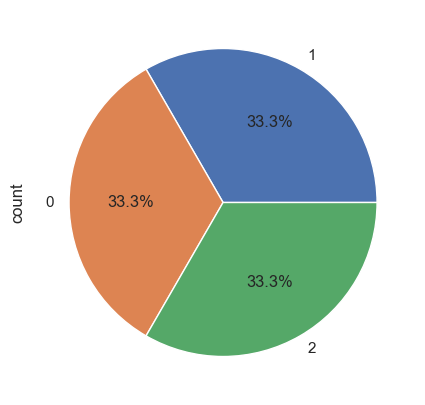

In [145]:
# plot the pie plot for the y before and after applying the RandomOverSampler technique
plt.figure(figsize=(10,5))
y.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

plt.figure(figsize=(10,5))
y_smote.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [146]:
# splitting the data into training and testing part
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.3,random_state=42)

In [147]:
# printing the shape of the training and testing data
print(f'Here is the shape of the x_train {x_train.shape}')
print(f'Here is the shape of the x_test {x_test.shape}')
print(f'Here is the shape of the y_train {y_train.shape}')
print(f'Here is the shape of the y_test {y_test.shape}')

Here is the shape of the x_train (249, 18)
Here is the shape of the x_test (108, 18)
Here is the shape of the y_train (249,)
Here is the shape of the y_test (108,)


# **MODEL BUILDING**

## **K-MEANS CLUSTERING**

In [148]:
from sklearn.cluster import KMeans

# Sample data (replace this with your own dataset)
X = np.array(df)

# Number of clusters you want to create
n_clusters = 3

# Initialize the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters)

# Fit the model to your data
kmeans.fit(X)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Print the cluster assignments and cluster centers
print("Cluster Assignments:")
print(cluster_labels)
print("\nCluster Centers:")
print(cluster_centers)


Cluster Assignments:
[1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 2 2 2 0 0 2 2 2 2 2 0 2 0 0 0 0
 0 0 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 0 0 2 2 0 2 0 2 0 2 2 0 0 0 2 0
 2 0 2 0 2 2 2 2 2 2 0 0 0 2 2 2 2 0]

Cluster Centers:
[[3.08616136e+04 3.12152955e+04 1.19467500e+05 6.35454545e+01
  6.35227273e+01 2.05909091e+01 8.86363636e-01 1.27272727e+00
  4.52272727e+00 2.11363636e+00 6.36363636e-01 3.40909091e+00
  2.20454545e+00 6.97727273e+00 4.34318182e+01 4.34318182e+01
  4.53181818e+01 2.72727273e-01 1.00000000e+00]
 [1.23319762e+04 1.00806905e+04 1.69833667e+05 5.64523810e+01
  5.64523810e+01 1.91666667e+01 1.00000000e+00 1.52380952e+00
  4.02380952e+00 2.14285714e+00 9.28571429e-01 4.50000000e+00
  2.71428571e+00 6.92857143e+00 3.88809524e+01 3.88809524e+01
  4.88333333e+01 3.80952381e-01 9.76190476e-01]
 [4.04848140e+04 4.22437442e+04 1.68900465e+05 7.18372093e+01
  7.18604651e+01 2.26744186e+01 9.76744186e-

c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


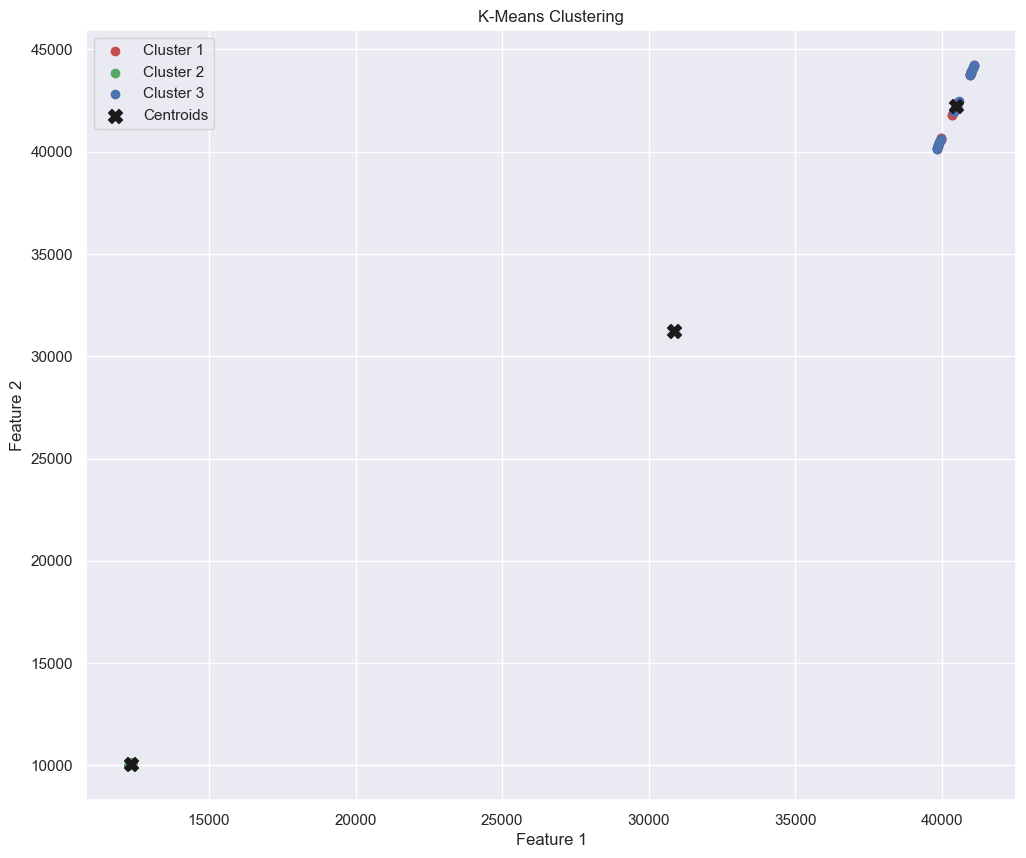

In [149]:
# Create a scatter plot to visualize the clusters
colors = ['r', 'g', 'b', 'y', 'c', 'm']  # You can extend this list if you have more clusters
for i in range(n_clusters):
    plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], c=colors[i], label=f'Cluster {i + 1}')

# Plot the cluster centers as well
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c='k', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [150]:
df.columns

Index(['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime',
       'deathtime', 'admission_type', 'admission_location',
       'discharge_location', 'insurance', 'language', 'religion',
       'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis',
       'hospital_expire_flag', 'has_chartevents_data'],
      dtype='object')

## **Probability Distributions (CPDs)**

In [151]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Assuming you have a DataFrame named df containing  data

# Extract unique values for each column in  data
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].unique()

# Define the structure of the Bayesian Network based on your data columns
model = BayesianNetwork([('D', 'G'), ('I', 'G'), ('G', 'L'), ('I', 'S')])

# Define Conditional Probability Distributions (CPDs) based on  data
# You'll need to calculate appropriate CPDs based on  dataset
# Assuming  have calculated the CPDs as cpd_d, cpd_i, cpd_g, cpd_l, cpd_s

# Add CPDs to the model
model.add_cpds(cpd_d, cpd_i, cpd_g, cpd_l, cpd_s)

# Check the model for correctness
assert model.check_model(), "The model structure is not consistent with the CPDs."

# Perform inference on your data
inference = VariableElimination(model)

# Replace the evidence with specific values from  dataset
# For example, to calculate the probability of 'L' given evidence on 'D' and 'I':
# Replace 'D' and 'I' with the appropriate column names from your DataFrame
# Replace the indices [0] with the appropriate row indices from your DataFrame
evidence_data = {'D': df['admission_type'].iloc[128], 'I': df['admission_type'].iloc[128]}
result = inference.query(variables=['L'], evidence=evidence_data)
print(result)


+------+----------+
| L    |   phi(L) |
+======+==========+
| L(0) |   0.2315 |
+------+----------+
| L(1) |   0.7685 |
+------+----------+


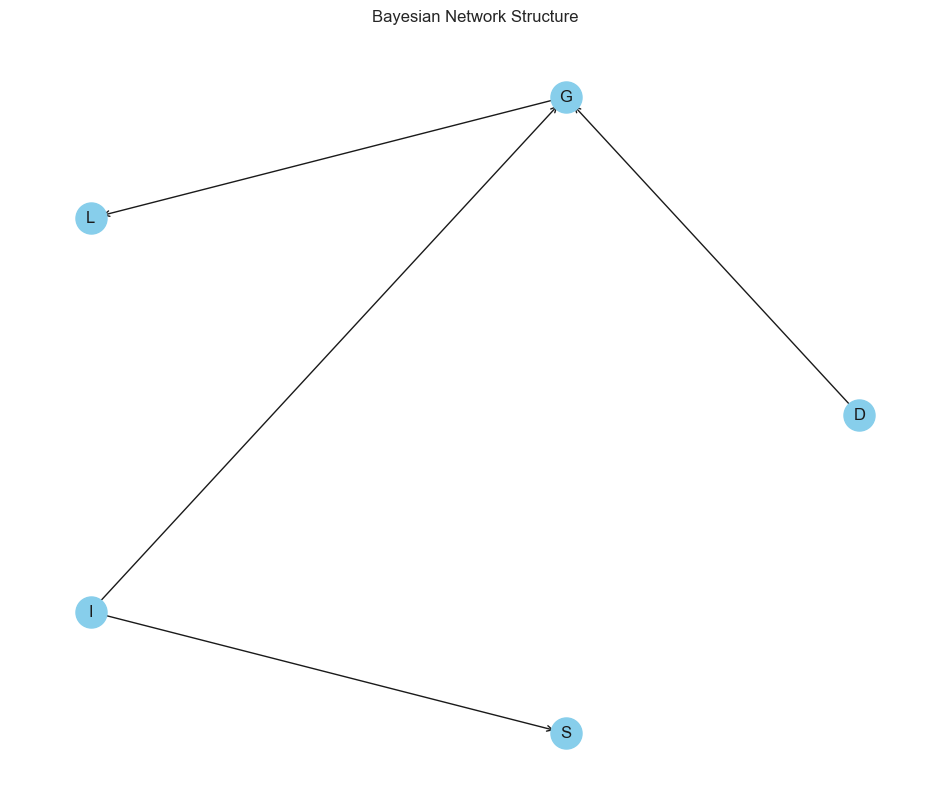

In [152]:
import networkx as nx
# Create a directed graph object from the model
graph = nx.DiGraph(model.edges())

# Set node positions using a layout (e.g., circular layout)
pos = nx.circular_layout(graph)

# Draw nodes and edges
nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='skyblue')
nx.draw_networkx_edges(graph, pos, arrows=True, arrowstyle='->', arrowsize=10)
nx.draw_networkx_labels(graph, pos)

# Show the plot
plt.title("Bayesian Network Structure")
plt.axis('off')
plt.show()

## **EM Algorithm(Expectation-Maximization)**

The EM algorithm stands for Expectation-Maximization. It's an iterative method used to find maximum likelihood or maximum a posteriori (MAP) estimates of parameters in statistical models, particularly when dealing with latent variables or incomplete data.

In the context of clustering, the EM algorithm is often applied to Gaussian Mixture Models (GMMs) to estimate the parameters of these models. GMM assumes that the data is generated from a mixture of several Gaussian distributions. The EM algorithm iterates between the expectation step (E-step) and maximization step (M-step) to update parameters until convergence, aiming to maximize the likelihood of the observed data

In [153]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Sample data (replace this with your own dataset)
X = np.array(df)

# Number of clusters you want to create
n_clusters = 3

# Initialize the Gaussian Mixture Model with the desired number of clusters
gmm = GaussianMixture(n_components=n_clusters, random_state=42)

# Fit the model to your data
gmm.fit(X)

# Get the cluster assignments for each data point
cluster_labels = gmm.predict(X)

# Get the cluster centers (mean of each Gaussian component)
cluster_centers = gmm.means_

# Print the cluster assignments and cluster centers
print("Cluster Assignments:")
print(cluster_labels)
print("\nCluster Centers:")
print(cluster_centers)

Cluster Assignments:
[2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1]

Cluster Centers:
[[4.04822463e+04 4.22320371e+04 1.57649803e+05 7.05612198e+01
  7.05787636e+01 2.20876858e+01 9.82456279e-01 1.33333070e+00
  5.03504899e+00 2.10526233e+00 1.21051721e+00 3.19297288e+00
  1.75438025e+00 6.43860825e+00 4.81928491e+01 4.81928491e+01
  5.25962220e+01 2.45619876e-01 1.00000000e+00]
 [3.71316146e+04 3.83501256e+04 1.17060052e+05 6.08238868e+01
  6.07650617e+01 2.40589882e+01 7.05874547e-01 1.35295051e+00
  3.58832675e+00 2.11765017e+00 3.52948931e-01 3.64710299e+00
  2.52945151e+00 6.70585002e+00 3.72354506e+01 3.72354506e+01
  3.79416901e+01 2.35274259e-01 1.00000000e+00]
 [1.23268000e+04 1.00756909e+04 1.57749564e+05 5.81818182e+01
  5.81818182e+01 1.85090909e+01 1.00000000e+

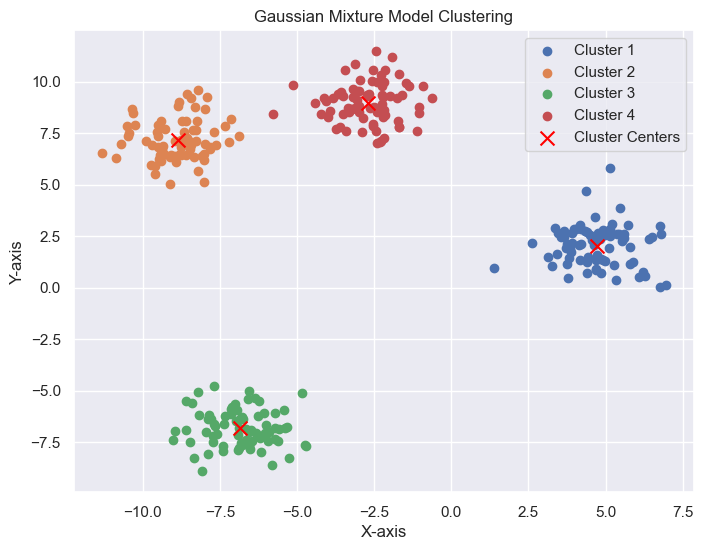

In [154]:

from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture


# Generating sample data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Number of clusters you want to create
n_clusters = 4

# Initialize the Gaussian Mixture Model with the desired number of clusters
gmm = GaussianMixture(n_components=n_clusters, random_state=42)

# Fit the model to your data
gmm.fit(X)

# Get the cluster assignments for each data point
cluster_labels = gmm.predict(X)

# Get the cluster centers (mean of each Gaussian component)
cluster_centers = gmm.means_

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
for i in range(n_clusters):
    plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], label=f'Cluster {i+1}')

# Plotting cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=100, label='Cluster Centers')

plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()


## **naive_bayes**

In [163]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import time
from tabulate import tabulate

# Initialize and train the Naive Bayes model
naive_bayes = GaussianNB()
start_time_nb = time.time()
naive_bayes.fit(x_train, y_train)
y_pred_nb = naive_bayes.predict(x_test)
end_time_nb = time.time()

# Calculate evaluation metrics for Naive Bayes for a multiclass problem
acc_nb = accuracy_score(y_test, y_pred_nb) * 100
pre_nb = precision_score(y_test, y_pred_nb, average='weighted') * 100
recall_nb = recall_score(y_test, y_pred_nb, average='weighted') * 100
f1_nb = f1_score(y_test, y_pred_nb, average='weighted') * 100


c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:605

In [164]:

# Calculate time taken for training and prediction with Naive Bayes
execution_time_nb = end_time_nb - start_time_nb

# Store results in a dictionary for Naive Bayes
results_nb = {
    'Accuracy': acc_nb,
    'Precision': pre_nb,
    'Recall': recall_nb,
    'F1_score': f1_nb,
    'Time Taken (seconds)': execution_time_nb
}

# Display results in a table for Naive Bayes
print("\nNaive Bayes Classifier Results:")
print(tabulate(results_nb.items(), headers=["Metrics", "Value"], tablefmt="grid"))


Naive Bayes Classifier Results:
+----------------------+-------------+
| Metrics              |       Value |
+======================+=============+
| Accuracy             | 81.4815     |
+----------------------+-------------+
| Precision            | 88.8889     |
+----------------------+-------------+
| Recall               | 81.4815     |
+----------------------+-------------+
| F1_score             | 80.7099     |
+----------------------+-------------+
| Time Taken (seconds) |  0.00899935 |
+----------------------+-------------+


## **linear regression**

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
from tabulate import tabulate

# Initialize and train the Linear Regression model
linear_reg = LinearRegression()
start_time = time.time()
linear_reg.fit(x_train, y_train)
y_pred_linear_reg = linear_reg.predict(x_test)
end_time = time.time()

# Calculate evaluation metrics for Linear Regression
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
mae_linear_reg = mean_absolute_error(y_test, y_pred_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg) * 100

# Calculate time taken for training and prediction
execution_time_linear_reg = end_time - start_time


c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:605

In [186]:
# Store results in a dictionary for Linear Regression
results_linear_reg = {
    'Mean Squared Error': mse_linear_reg,
    'Mean Absolute Error': mae_linear_reg,
    'R^2 Score': r2_linear_reg,
    'Time Taken (seconds)': execution_time_linear_reg
}

# Display results in a table for Linear Regression
print("Linear Regression Results:")
print(tabulate(results_linear_reg.items(), headers=["Metrics", "Value"], tablefmt="grid"))

Linear Regression Results:
+----------------------+-------------+
| Metrics              |       Value |
+======================+=============+
| Mean Squared Error   |  0.164146   |
+----------------------+-------------+
| Mean Absolute Error  |  0.321169   |
+----------------------+-------------+
| R^2 Score            | 73.7006     |
+----------------------+-------------+
| Time Taken (seconds) |  0.00899839 |
+----------------------+-------------+


## **decision tree**

In [199]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier(ccp_alpha=0.2)
start_time_dt = time.time()
decision_tree.fit(x_train, y_train)
y_pred_dt = decision_tree.predict(x_test)
end_time_dt = time.time()

# Calculate evaluation metrics for Decision Tree
acc_dt = accuracy_score(y_test, y_pred_dt) * 100
report_dt = classification_report(y_test, y_pred_dt)

# Calculate time taken for training and prediction
execution_time_dt = end_time_dt - start_time_dt

acc_dt


c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:605

93.51851851851852

In [202]:
# Display results in a table for Decision Tree
print("\nDecision Tree Classifier Results:")
print(f'accuracy_score {acc_dt}')
print('\nClassification report for Decision Tree:\n', report_dt)


Decision Tree Classifier Results:
accuracy_score 93.51851851851852

Classification report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      0.82      0.90        40
           2       0.84      1.00      0.92        38

    accuracy                           0.94       108
   macro avg       0.95      0.94      0.94       108
weighted avg       0.95      0.94      0.93       108



## **MLP**

In [207]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the MLP model
mlp = MLPClassifier(random_state=42)
start_time_mlp = time.time()
mlp.fit(x_train, y_train)
y_pred_mlp = mlp.predict(x_test)
end_time_mlp = time.time()

# Calculate evaluation metrics for MLP
acc_mlp = accuracy_score(y_test, y_pred_mlp) * 100

report_mlp = classification_report(y_test, y_pred_mlp)

# Calculate time taken for training and prediction for MLP
execution_time_mlp = end_time_mlp - start_time_mlp

# Store results in a dictionary for MLP
results_mlp = {
    'Accuracy': acc_mlp,
    'Time Taken (seconds)': execution_time_mlp
}


c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:605

c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\utils\validation.py:605

In [208]:
# Display results in a table for MLP
print("MLP Classifier Results:")
print(tabulate(results_mlp.items(), headers=["Metrics", "Value"], tablefmt="grid"))
print('\nClassification report for MLP:\n', report_mlp)

MLP Classifier Results:
+----------------------+-----------+
| Metrics              |     Value |
+======================+===========+
| Accuracy             | 63.8889   |
+----------------------+-----------+
| Time Taken (seconds) |  0.957001 |
+----------------------+-----------+

Classification report for MLP:
               precision    recall  f1-score   support

           0       0.48      0.77      0.59        30
           1       0.89      0.20      0.33        40
           2       0.75      1.00      0.85        38

    accuracy                           0.64       108
   macro avg       0.70      0.66      0.59       108
weighted avg       0.72      0.64      0.59       108



## **CNN**

In [211]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D,Flatten,Dropout,Dense

In [212]:
(X_train,y_train) , (X_test,y_test)=mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 
print(X_train.shape)
print(X_test.shape)
X_train=X_train/255
X_test=X_test/255

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [213]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1516 - accuracy: 0.9546
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0514 - accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0340 - accuracy: 0.9891
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0232 - accuracy: 0.9928
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0161 - accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0109 - accuracy: 0.9966
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0082 - accuracy: 0.9973
Epoch 8/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0070 - accuracy: 0.9979
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0051 - accuracy: 0.9983
Epoch 10/10
1875/1875 [==============================] - 34s 18m

In [214]:
Cn=model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0511 - accuracy: 0.9886


In [215]:
Cn

[0.051099684089422226, 0.9886000156402588]

In [218]:
Cn[1]

0.9886000156402588

# **Accurecy Graph of all The Algorithm**

In [219]:
graph = pd.DataFrame({'Modules':['GaussianNB','LinearRegression','DecisionTreeClassifier','MLPClassifier','CNN'],
                      'Accuracy':[acc_nb,r2_linear_reg,acc_dt,acc_mlp,Cn[1]*100]})

In [220]:
graph

,Modules,Accuracy
0,GaussianNB,81.481481
1,LinearRegression,73.700564
2,DecisionTreeClassifier,93.518519
3,MLPClassifier,63.888889
4,CNN,98.860002


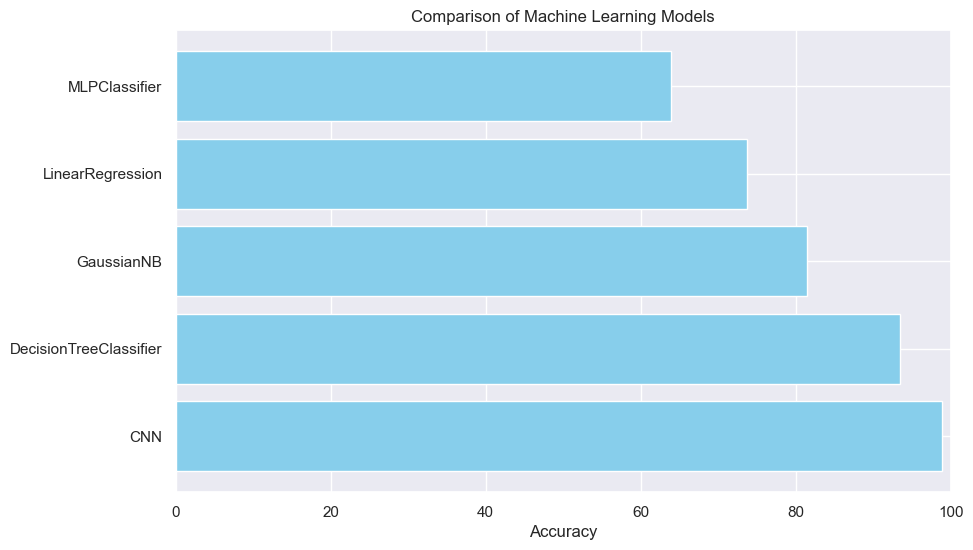

In [222]:
# Sorting the DataFrame by Accuracy for better visualization
graph = graph.sort_values(by='Accuracy', ascending=False)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.barh(graph['Modules'], graph['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Machine Learning Models')
plt.xlim(0, 100)  # Adjust the x-axis limit if needed
plt.show()

# **Prediction**

In [242]:
inp = [12258,	10006,	142345,	80	,80	,7,	1,	3,	2	,2,	1,	2,	2,	54,	54,	73,	0	,1]

In [243]:
result = decision_tree.predict([inp])

c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [244]:
if result == 0:
    print('ELECTIVE')
elif result == 1:
    print("EMERGENCY")
else:
    print('URGENT')

EMERGENCY


In [245]:
inp1 = [40496,	42231,	171878,	0,	9,	0,	2,	3,	2,	0,	1,	1,	8,	7,	7,	64,	0,	1]

In [246]:
result1 = decision_tree.predict([inp1])

c:\Users\0630\Desktop\TK129848\CODE\CSV DATA\BACKEND\.venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [247]:
if result1 == 0:
    print('ELECTIVE')
elif result1 == 1:
    print("EMERGENCY")
else:
    print('URGENT')

ELECTIVE


# ***-------------------------THE END--------------------------***